# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Proportion of missing values in subject_injury: 76.19%
SentenceTypeAllChargesAtConvictionInContactEvent     0   1  2
ImposedSentenceAllChargeInContactEvent                       
0.000000                                          4953   0  0
0.032854                                             0   6  0
0.065708                                             3  21  0
0.098563                                             2   6  0
0.131417                                             4  10  0
...                                                ...  .. ..
1200.000000                                          0   0  1
1500.000000                                          0   0  1
1752.000000                                          0   0  1
1980.000000                                          0   0  1
2208.000000                                          0   0  1

[483 rows x 3 columns]
Number of rows with SentenceTypeAllChargesAtConvictionInContactEvent == 0 and ImposedSentenceAllChargeAllChargeInCo

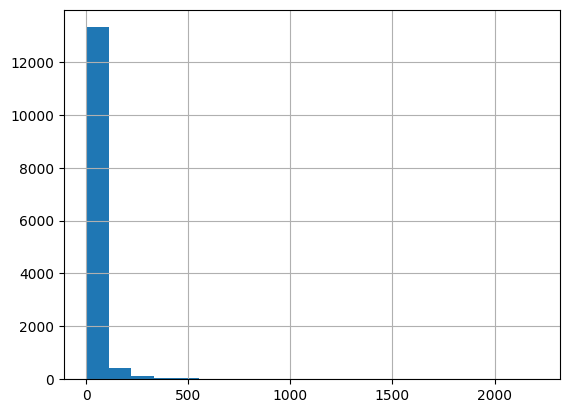

In [43]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/airbnb_hw.csv")

# 1) Cleaning the price variable

# coerce the data into a numeric format
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# check to see if there are missing data
df["Price_nan"] = df["Price"].isnull()
df["Price_nan"].value_counts() # <- There are 181 true values in the dummy variable Price_nan, useful to know for later

# I'm not going to impute the data since there is no clear motivation, better to just ignore missing values if needed in future analysis

# 2)

df = pd.read_csv("./data/mn_police_use_of_force.csv")

# create a dummy variable to indicate missing data in subject_injury
df["subject_injury_nan"] = df["subject_injury"].isnull()

# calculate the proportion of missing data in subject_injury
ratio = df['subject_injury_nan'].value_counts()[True]/sum(df['subject_injury_nan'].value_counts())
print(f"Proportion of missing values in subject_injury: {ratio:.2%}")
# 76.19% is a lot of missing data, this is concerning and would cause me to doubt any conclusions drawn from this variable

# Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

ct = pd.crosstab(df['force_type'], df['subject_injury_nan'])
# print(ct)

# The two categories with the most missing data are "Bodily Force" and "Checmical Irritant", as to why exactly this is I see no clear answer. 

# 3) 

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

# print(df['WhetherDefendantWasReleasedPretrial'].value_counts()) # shows data has 31 9s which makes no sense since they should be 1 or 0
df['WhetherDefendantWasReleasedPretrial'] = df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan) # replace with np.nan

# 4) 4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

df["ImposedSentenceAllChargeInContactEvent"].describe()
df["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors="coerce") # coerce to numeric
df["ImposedSentenceAllChargeInContactEvent"].hist(bins=20) # clearly most of the data is around 0 months
pd.crosstab(df["ImposedSentenceAllChargeInContactEvent"], df["SentenceTypeAllChargesAtConvictionInContactEvent"])
df["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts()

# According to the codebook, values 4 and 9 in the SentenceTypeAllChargesAtConvictionInContactEvent indicate either deferred or NA data, I'm going to assume that in these cases the ImposedSentenceAllChargeInContactEvent should be missing as well

# find all rows where SentenceTypeAllChargesAtConvictionInContactEvent is 4 or 9
mask = df["SentenceTypeAllChargesAtConvictionInContactEvent"].isin([4, 9])

# set ImposedSentenceAllChargeInContactEvent to np.nan for those rows
df.loc[mask, "ImposedSentenceAllChargeInContactEvent"] = np.nan

# The codebook also seems to indicate that if the SentenceTypeAllChargesAtConvictionInContactEvent is 0 then the ImposedSentenceAllChargeInContactEvent should also be 0

mask = (df["SentenceTypeAllChargesAtConvictionInContactEvent"] == 0) & (df["ImposedSentenceAllChargeInContactEvent"] > 0)
total_zero = (df["SentenceTypeAllChargesAtConvictionInContactEvent"] == 0).sum()
print(f"Number of rows with SentenceTypeAllChargesAtConvictionInContactEvent == 0 and ImposedSentenceAllChargeAllChargeInContactEvent > 0: {mask.sum()}")
print(f"Proportion: {mask.sum() / total_zero:.2%}")

# but in this case since there are 3767 such rows, which is 43% of the total with SentenceTypeAllChargesAtConvictionInContactEvent == 0, I'm going to assume that the ImposedSentenceAllChargeInContactEvent and that judges sometimes give sentences dispite the sentence type








**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Proportion of male victims: 83.45%
Proportion of unprovoked attacks: 83.20%
Proportion of unprovoked attacks on women: 87.50%
Proportion of unprovoked attacks on men: 82.52%
Proportion of attacks by white sharks: 13.20%


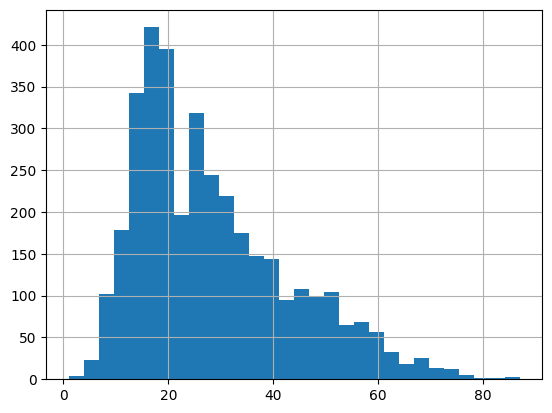

In [ ]:
# 1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
import pandas as pd

df = pd.read_excel("./data/GSAF5.xls")

# 2. Drop any columns that do not contain data.

empty_cols = df.columns[df.isnull().all()]
df = df.drop(columns=empty_cols)

# 3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

df.head()
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].describe()

# min = 0, max = 2026, the 0 years clearly don't make sense but I'm gonna filter out years before 1940 anyway

df = df[df["Year"] >= 1940]
# df["Year"].hist(bins=20)

# looking at the hist, attacks are increasing on average over time, with some variation year to year

# 4. Clean the Age variable and make a histogram of the ages of the victims.

df["Age"].unique()

# filter out any non-numeric ages, and remove nans
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df = df[df["Age"].notnull()]

df["Age"].hist(bins=30)

# 5. What proportion of victims are male?

# find proportion of male to total victims

num_males = df[df["Sex"] == "M"].shape[0]
total_victims = df.shape[0]
proportion_males = num_males / total_victims
print(f"Proportion of male victims: {proportion_males:.2%}")

# 83.45% are males

# 6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

df["Type"].unique()
df["Type"] = df["Type"].replace({
    "Questionable": "Unknown", 
    "Watercraft": "Unknown", 
    "Sea Disaster": "Unknown", 
    "?": "Unknown",
    "Invalid": "Unknown",
    "Under investigation": "Unknown",
    "unprovoked": "Unprovoked"
})

# repace nan with Unknown
df["Type"] = df["Type"].fillna("Unknown")

df["Type"].unique()

proportion_unprovoked = (df["Type"] == "Unprovoked").sum() / df.shape[0]
print(f"Proportion of unprovoked attacks: {proportion_unprovoked:.2%}")
# 83.20% are unprovoked

# 7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

df["Fatal Y/N"].unique()
# ['N', 'Y', 'F', nan, 'M', 2017, 'UNKNOWN', ' N']
df["Fatal Y/N"] = df["Fatal Y/N"].replace({
    "F": "Y",
    "M": "Unknown",
    "UNKNOWN": "Unknown",
    " N": "N",
    2017: "Unknown"
})
df["Fatal Y/N"] = df["Fatal Y/N"].fillna("Unknown")
df["Fatal Y/N"].unique()

# 8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

# find proportion of men who are attacked unprovoked, and women who are attacked unprovoked
unprovoked_attacks = df[df["Type"] == "Unprovoked"]
num_unprovoked  = unprovoked_attacks.shape[0]
num_unprovoked_men = unprovoked_attacks[unprovoked_attacks["Sex"] == "M"].shape[0]
num_unprovoked_women = unprovoked_attacks[unprovoked_attacks["Sex"] == "F"].shape[0]
attacks_on_men = num_males
attacks_on_women = df[df["Sex"] == "F"].shape[0]
uaow = num_unprovoked_women / attacks_on_women
uaom = num_unprovoked_men / attacks_on_men
print(f"Proportion of unprovoked attacks on women: {uaow:.2%}")
print(f"Proportion of unprovoked attacks on men: {uaom:.2%}")

# of men that are attacked, 82.52% are unprovoked, of the women that are attacked, 87.50% are unprovoked which means that women are sligthly more likely to be attacked unprovoked (from one angle the other being that since men are attacked more often overall, they have more provoked attacks in total)

# 9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

df["Species "].unique()
# find all rows where Species contains "white" using str.split()
mask = df["Species "].str.lower().str.contains("white", na=False) # str.contains works better here I think
num_white_shark_attacks = df[mask].shape[0]
proportion_white_shark_attacks = num_white_shark_attacks / df.shape[0]
print(f"Proportion of attacks by white sharks: {proportion_white_shark_attacks:.2%}")
# 13.20% of attacks are by white sharks



**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  A framework for "tidy datasets", which make data cleaning much faster and easier. 

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  A standardized way to organize data whithin a dataset that facilitates cleaning and analysis. The standard is based on computer science principles such as those found in relational databases. 

  3. Read the intro to section 2. 
  
  What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." 
  
  Tidy datasets are all structured alike in according to a standard. Messy datasets have many different ways they can be "messy".
  
  What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  Sometimes it is easier to think of a "variable" as being a combination of two attributes found in a dataset (ie. width and height where the underlying variable is a "dimension"). Other times the variable itself is the attribute. The same logic applies to observations where multiple lines in a dataset could theoretically represent one or more observations. 

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Values: numbers or strings
  Variables: all values that measure the same underlying attribute
  Observations: all values measured on the same unit (person, day or race)

  5. How is "Tidy Data" defined in section 2.3?

  Tidy variables must satisfy the following:

  1. Each variable forms a column.
  2. Each observation forms a row.
  3. Each type of observational unit forms a table

  6. Read the intro to Section 3 and Section 3.1. 
  
  
  What are the 5 most common problems with messy datasets? 
  
  Column headers are values, not variable names.
  Multiple variables are stored in one column.
  Variables are stored in both rows and columns.
  Multiple types of observational units are stored in the same table.
  A single observational unit is stored in multiple tables.
  
  Why are the data in Table 4 messy? 
  
  The dataset has variables as rows and columns, violating the first and second rules of tidy data.

  What is "melting" a dataset?

  Melting means turning columns into rows (or rows into observations) in a way that perserves the meaning in the dataset.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 has a column for each day in the month, this means that column headers are values (the value correspoding to what day of the month it is). This is one of the common problems with a messey dataset found above.
  Table 12 has converted these values to correspond to a date, creating data where all of the variables correspond to one column (molten). It then creates tidy data by adding tmax and tmin variables instead of having element (tmax or tmin) and value (the value of the max or min for that day).

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  The chicken and egg problem refers to the fact that if tidy data is only as useful as the tools that work with it, then tidy tools will be linked to tidy data. He hopes that in the future more people build on his framework and develop tools and data structures that make data analysis (and tidying) faster an easier.